=== Análisis de Calidad de Vinos Tintos ===
Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Estadísticas descriptivas:
       fixed acidity  vo

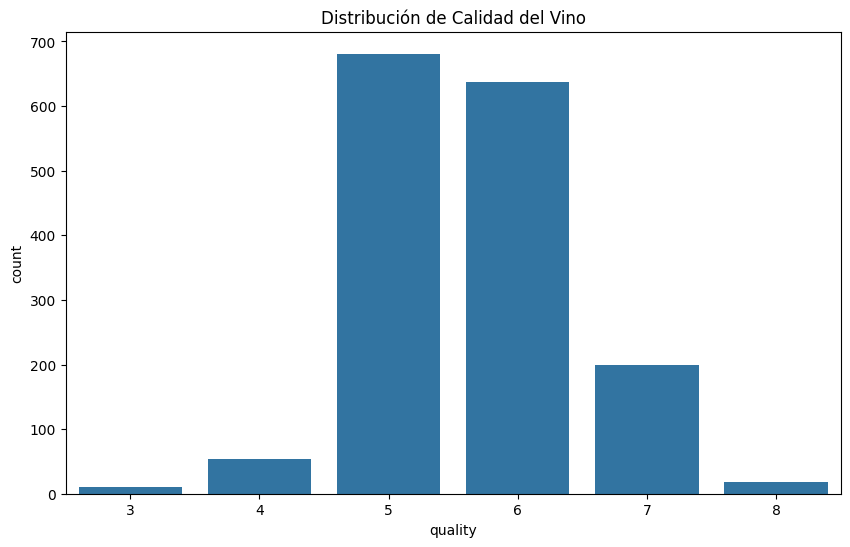

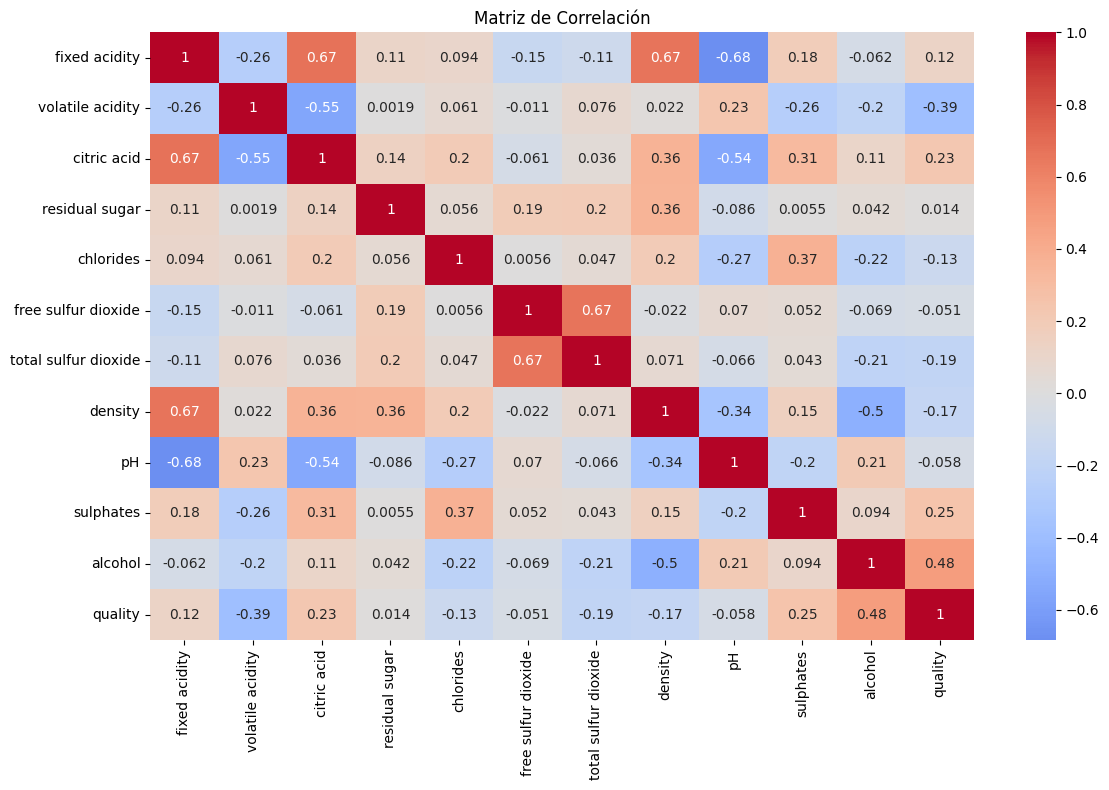


Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Registros eliminados por outliers: 420


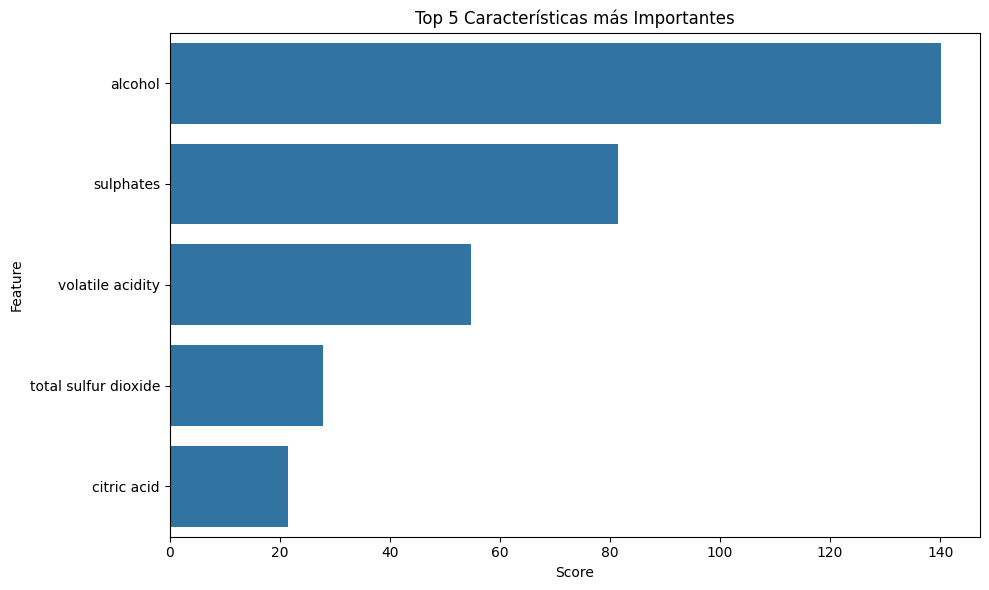


Características seleccionadas: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

Reporte de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.61      0.74      0.67       103
           6       0.56      0.54      0.55       100
           7       0.50      0.26      0.34        27

    accuracy                           0.58       236
   macro avg       0.42      0.38      0.39       236
weighted avg       0.56      0.58      0.56       236



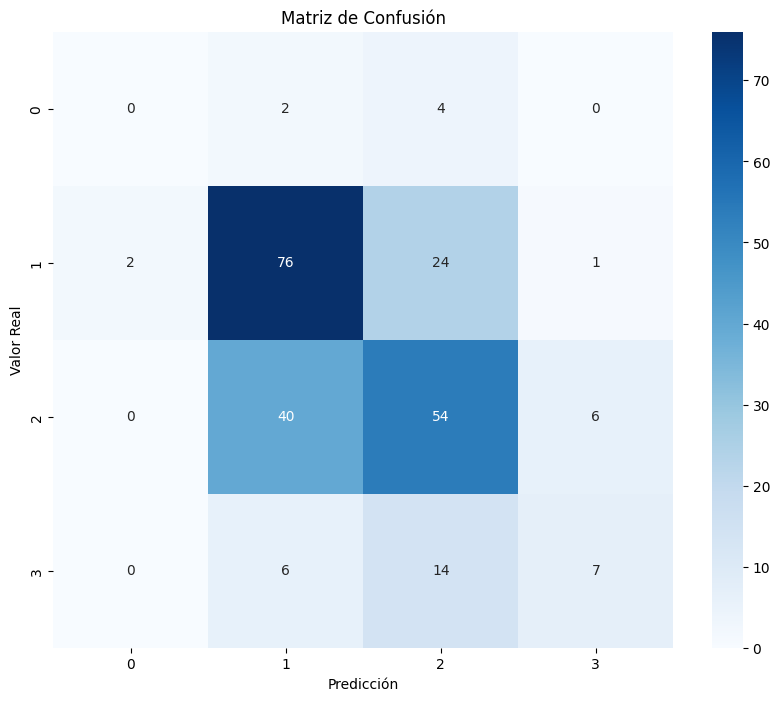

None


In [6]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# 1. Cargar y explorar datos
def load_and_explore_data(path):
    # Cargar dataset
    df = pd.read_csv(path, sep=',')

    print("Información del Dataset:")
    print(df.info())
    print("\nEstadísticas descriptivas:")
    print(df.describe())

    # Visualizar distribución de calidad
    plt.figure(figsize=(10, 6))
    print(df)
    sns.countplot(data=df, x='quality')
    plt.title('Distribución de Calidad del Vino')
    plt.show()

    # Matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.tight_layout()
    plt.show()

    return df

# 2. Preprocesar datos
def preprocess_data(df):
    # Verificar valores nulos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    # Detectar y tratar outliers usando IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    print(f"\nRegistros eliminados por outliers: {len(df) - len(df_clean)}")

    return df_clean

# 3. Selección de características
def select_features(X, y, k=5):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)

    # Obtener nombres de características seleccionadas
    selected_features = X.columns[selector.get_support()].tolist()

    # Visualizar importancia de características
    scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=scores.head(k), x='Score', y='Feature')
    plt.title(f'Top {k} Características más Importantes')
    plt.tight_layout()
    plt.show()

    return X_selected, selected_features

# 4. División del dataset
def split_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# 5. Entrenar modelo
def train_model(X_train, y_train):
    # Configurar hiperparámetros
    dt = DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

    # Entrenar modelo
    dt.fit(X_train, y_train)
    return dt

# 6. Evaluar modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt='d',
        cmap='Blues'
    )
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

# Ejecutar análisis completo
def main(path):
    print("=== Análisis de Calidad de Vinos Tintos ===")

    # 1. Cargar y explorar datos
    df = load_and_explore_data(path)

    # 2. Preprocesar datos
    df_clean = preprocess_data(df)

    # Separar features y target
    X = df_clean.drop('quality', axis=1)
    y = df_clean['quality']

    # 3. Seleccionar características
    X_selected, selected_features = select_features(X, y)
    print("\nCaracterísticas seleccionadas:", selected_features)

    # 4. Dividir dataset
    X_train, X_test, y_train, y_test = split_dataset(X_selected, y)

    # 5. Entrenar modelo
    model = train_model(X_train, y_train)

    # 6. Evaluar modelo
    evaluate_model(model, X_test, y_test)

if __name__ == "__main__":
    path = "/content/winequality-red.csv"
    print(main(path))